In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Distribution of the Sample Average

We will work with the flight delays dataset again (flight delays for United flights in summer 2015).

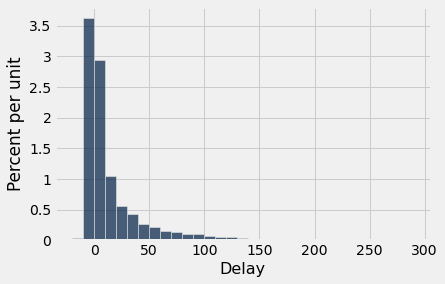

In [2]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [3]:
delays = united.column('Delay')
population_mean = np.mean(delays)
population_sd = np.std(delays)
population_mean, population_sd

(16.658155515370705, 39.480199851609314)

We'll write code to generate a sample of flights, and take the mean delay in that sample.  We call that the *sample mean*.  Remember that the sample mean is an estimate of the population mean (i.e., mean flight delay of all flights).

In [4]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

Let's take many samples, compute the mean of each, and look at the distribution of these sample means.

In [5]:
def ten_thousand_sample_means(sample_size):
    """Approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

Population Average: 16.6581555154


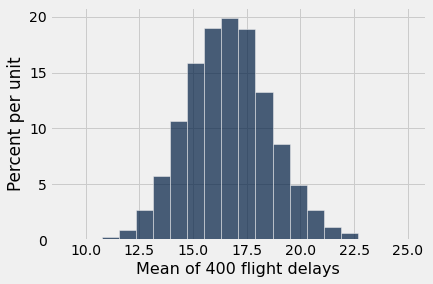

In [6]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', population_mean)

How many possible ways are there that the sample could have come out?  In other words, how many possible samples are there?

In [7]:
united.num_rows

13825

In [8]:
# How many possible sample means are there?
united.num_rows ** 400

1845253300060122534684058597421182951017338738756884128476156537109395559702295050837795610986469015706417701209704203890696502616877632733167737247128710898267622177602279004150237321497531712957437744194467949953310673085563343687922543234838511385550568262088418334016217887061735745358842456577208939555740404373614633941136938352510678553686140728842897559436843191863609514780562396147921834537075860636817493656816017587537752125750151805566479543166742758254440594398100342650860455445795087942680221047750947255562969782801791748639952850756659518870235020316513575934561122027710440608023538776721761349403194150575014182981349346980577699633375066811153948871815566280319121565243984196831524157664160526536071758298269096548661601001356951548310460921171197940711389849058290284443729287317331793254191518876765178731748453564076631795997590039640387156475975294002056115371653663653810384491550154761367793765502453546587829476276348569091617961438914859251316410793595152416543512156519

Far too many samples to enumerate them all!  So while there *is* a well-defined distribution given by all possible sample means from all samples, it is too hard to compute it exactly.  Instead, we approximate this distribution by drawing 10000 samples from it and drawing the histogram of those samples.

Now let's look at how the shape of this distribution of sample means depends on the size of the sample.

In [9]:
sample_means_900 = ten_thousand_sample_means(900)

In [10]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)

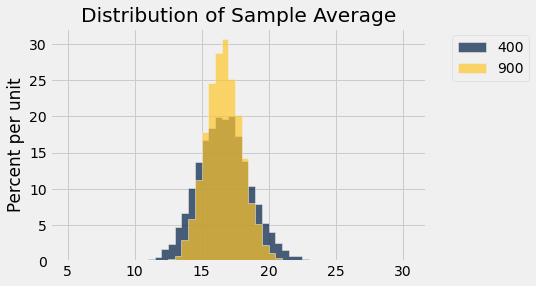

In [11]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

How would you interpret this picture?  What does it tell you about the effect of increasing the sample size?

In [12]:
"""Empirical distribution of random sample means"""
def plot_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", population_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", population_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.60676
Population SD: 39.4801998516
SD of sample means: 3.94015749462


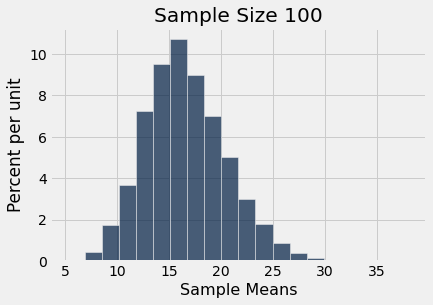

In [13]:
plot_sample_means(100)

In [14]:
39.48 / 3.932

10.040691759918616

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.68640325
Population SD: 39.4801998516
SD of sample means: 1.96998499049


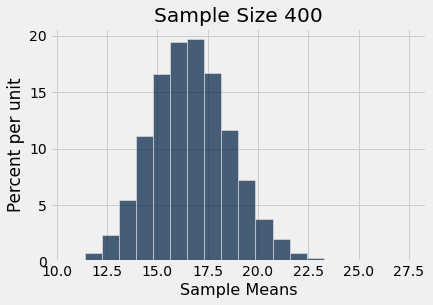

In [15]:
plot_sample_means(400)

In [16]:
39.48 / 1.973

20.010136847440442

Sample size:  625
Population mean: 16.6581555154
Average of sample means:  16.64264256
Population SD: 39.4801998516
SD of sample means: 1.57950195404


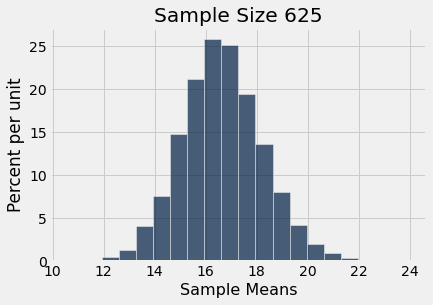

In [17]:
plot_sample_means(625)

In [18]:
39.48 / 1.577

25.034876347495242

In [19]:
39.48 / np.sqrt(100)

3.9479999999999995

In [20]:
39.48 / np.sqrt(400)

1.9739999999999998

In [21]:
39.48 / np.sqrt(625)

1.5791999999999999

## SD of the sample mean

In [22]:
# Warning: this cell will take a long time to run!
sample_sizes = np.arange(100, 950, 50)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [23]:
sd_table = Table().with_columns(
    'Sample size', sample_sizes,
    'SD of simulated sample means', sample_mean_sds,
    'Pop SD / sqrt(sample size)', population_sd / np.sqrt(sample_sizes),
)
sd_table

Sample size,SD of simulated sample means,Pop SD / sqrt(sample size)
100,3.95214,3.94802
150,3.19894,3.22354
200,2.77615,2.79167
250,2.5077,2.49695
300,2.26678,2.27939
350,2.11867,2.11031
400,1.97284,1.97401
450,1.85016,1.86111
500,1.75887,1.76561
550,1.66944,1.68344


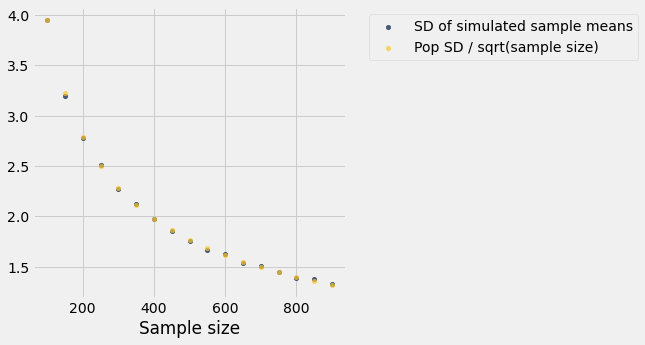

In [24]:
sd_table.scatter('Sample size')

## Other distributions

/opt/anaconda3/lib/python3.9/site-packages/datascience/tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


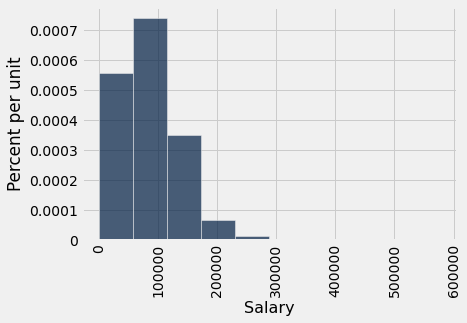

In [25]:
sf_salaries = Table.read_table("san_francisco_2019.csv")
sf_salaries.hist("Salary")

In [26]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_salaries = sf_salaries.sample(sample_size)
    return np.mean(sampled_salaries.column('Salary'))

In [27]:
def ten_thousand_sample_means(sample_size):
    """Approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

Population Average: 80608.7076025


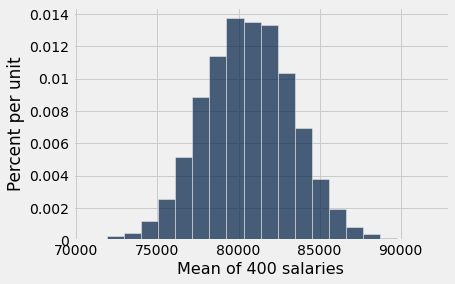

In [28]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 salaries', sample_means_400).hist(bins=20)
print('Population Average:', np.mean(sf_salaries.column("Salary")))